<a href="https://colab.research.google.com/github/Uriel1201/HelloPython/blob/main/TrinomialDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trinomial Coefficients
Trinomial coefficients arise in combinatorics. The trinomial coefficient,
denoted as T(n, k), represents the coefficient of x^(n+k) in the expansion
of (1+x+x^2)^n. This script computes the trinomial coefficient T(n,k) using dynamic programming. This version should be fast enough to handle larger values of n and k.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def trinomial(n, k):
    if k < 0:
        k = -k
    if k > n:
        return 0
    dim = (n + 1, 2 * (n + 1))
    triangle = np.zeros(dim, dtype = np.int64)
    triangle[0][1] = 1
    i_index, j_index = np.indices((n + 1, 2 * (n + 1)))
    mask = (i_index >= 1) & (j_index >= 1) & (j_index < 2 * (i_index + 1))
    i_index = i_index[mask]
    j_index = j_index[mask]
    for i, j in zip(i_index, j_index):
        if j == 1:
            triangle[i][j] = 1
        else:
            triangle[i][j] = triangle[i - 1][j] + triangle[i - 1][j - 1] + triangle[i - 1][j - 2]
    return triangle[n][n + k + 1]

In [ ]:
def main():
    n = int(input(f'integer n: '))
    k = np.arange(-n, n + 1, dtype = int)
    trinomial_v = np.vectorize(trinomial)
    y = trinomial_v(np.full_like(k, n), k)
    plt.figure(figsize = (9, 8))
    sns.set(style = 'darkgrid')
    plt.title(f'trinomial coefficients for n: {n}')
    sns.scatterplot(x = k, y = y, color = '#088F8F')
    plt.tight_layout()
    plt.show()
    print(f'trinomial({n}, {k[n]}): {y[n]}')

integer n: 42


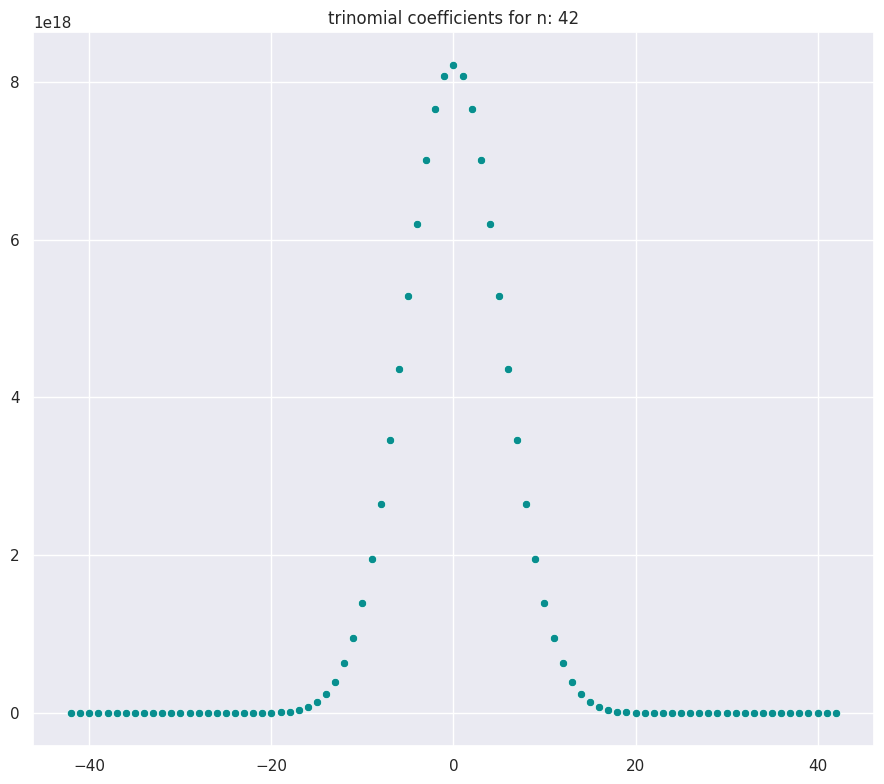

trinomial(42, 0): 8212609533895771131


In [ ]:
if __name__ == '__main__':
    main()